<a href="https://colab.research.google.com/github/leoonhardt/mantenimientopredictivo/blob/main/Ejemplo_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo 2: Extracción de parámetros

# Degradación en rodamientos

En el presente ejemplo se trabajó con un montaje experimental que permite operar rodamientos en condiciones desfavorables (velocidad y carga). Obteniendo una gran cantidad de información sobre la degradaciòn de estos. El montaje se presenta a continuación:

<div align="center"><img src="https://raw.githubusercontent.com/leoonhardt/mantenimientopredictivo/master/datos/ejemplo2/montaje.png" height="400"></div>



En particular, para esta experiencia se cuenta con 4 rodamientos en serie sometidos a cierta carga y velocidad, por degradación uno de ellos fallará con el paso del tiempo, cada uno de los rodamientos cuenta con su respectivo acelerómetro con el cual se podrá dimensionar la magnitud de las vibraciones asociadas a ellos. Contamos con datos de RMS de 3 ensayos distintos con su respectivo vector de tiempo para cada uno de ellos, el ensayo se detiene en el momento en que uno de los rodamientos falla.

A continuación el código:





Como vimos en el ejemplo anterior, lo primero que se debe hacer es clonar el github asociado a este curso:

In [1]:
!git clone https://github.com/leoonhardt/mantenimientopredictivo.git

Cloning into 'mantenimientopredictivo'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (183/183), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 183 (delta 60), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (183/183), 37.94 MiB | 19.81 MiB/s, done.
Resolving deltas: 100% (60/60), done.


Hecho lo anterior, se deben importar las librerías necesarias y los datos mencionados anteriormente:

Text(0.5, 1.0, 'Falla en pista externa R3')

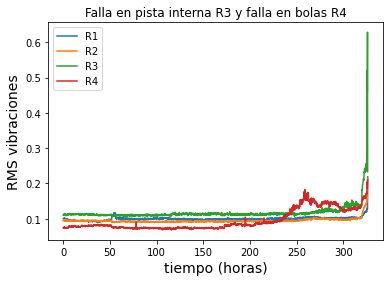

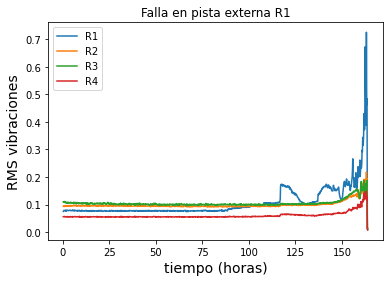

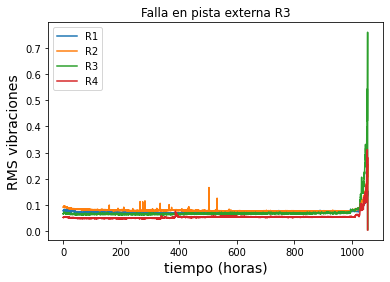

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#registro de datos de vibraciones en RMS
Datos1 = pd.read_csv('/content/mantenimientopredictivo/datos/ejemplo2/RMSvibraciones1.txt')
Datos2 = pd.read_csv('/content/mantenimientopredictivo/datos/ejemplo2/RMSvibraciones2.txt')
Datos3 = pd.read_csv('/content/mantenimientopredictivo/datos/ejemplo2/RMSvibraciones3.txt')

#registro de tiempo en minutos
t1 = pd.read_csv('/content/mantenimientopredictivo/datos/ejemplo2/time1.txt')
t2 = pd.read_csv('/content/mantenimientopredictivo/datos/ejemplo2/time2.txt')
t3 = pd.read_csv('/content/mantenimientopredictivo/datos/ejemplo2/time3.txt')

#Graficando
plt.figure()
plt.plot(t1/60,Datos1)
plt.xlabel('tiempo (horas)', fontsize=14)
plt.ylabel('RMS vibraciones', fontsize=14)
plt.legend(['R1','R2','R3','R4'])
plt.title('Falla en pista interna R3 y falla en bolas R4')

plt.figure()
plt.plot(t2/60,Datos2)
plt.xlabel('tiempo (horas)', fontsize=14)
plt.ylabel('RMS vibraciones', fontsize=14)
plt.legend(['R1','R2','R3','R4'])
plt.title('Falla en pista externa R1')

plt.figure()
plt.plot(t3/60,Datos3)
plt.xlabel('tiempo (horas)', fontsize=14)
plt.ylabel('RMS vibraciones', fontsize=14)
plt.legend(['R1','R2','R3','R4'])
plt.title('Falla en pista externa R3')

R1, R2, R3 y R4 representan a cada uno de los rodamientos, como podemos comprobar, los rodamientos al estar sometidos a cargas desfavorables sufren degradación con el paso del tiempo, esta degradación se ve reflejada en un aumento significativo en la amplitud de las vibraciones asociadas a ellos y por ende también de su valor RMS.

Visualmente, algunas de las fallas producidas por degradación se muestran a continuación:

<div align="center"><img src="https://raw.githubusercontent.com/leoonhardt/mantenimientopredictivo/master/datos/ejemplo2/rodamientos.png" height="400"></div>

# Extracción de parámetros

Veremos a continuación otro experimento en donde se introdujeron fallas en dos rodamientos que soportan el eje de un motor. A modo de monitoreo se midieron las vibraciones en ambos rodamientos, la velocidad de giro del eje es de aproximadamente 1700 RPM. Se cuentan con datos de rodamientos en buenas condiciones, con falla en la pista interna y con falla en la pista externa. 

<div align="center"><img src="https://raw.githubusercontent.com/leoonhardt/mantenimientopredictivo/master/datos/ejemplo2/montaje2.png" height="400"></div>

En el presente ejemplo se verá el concepto de extracción de parámetros (RMS, peak to peak, peak, varianza, entre otros) y el como cada uno de ellos puede caracterizar el comportamiento y las fallas en los rodamientos, pensando en un futuro sistema de clasificación por medio de Machine Learning. 

A continuación el código:



Lo primero siempre es importar las librerías necesarias, además de los datos de aceleración mencionados anteriormente

In [4]:
#importar librerías
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import kurtosis, skew
from numpy import mean, sqrt, square

#Leer datos
Datos0=sio.loadmat('/content/mantenimientopredictivo/datos/ejemplo2/normal.mat')
Datos1=sio.loadmat('/content/mantenimientopredictivo/datos/ejemplo2/outer.mat')
Datos2=sio.loadmat('/content/mantenimientopredictivo/datos/ejemplo2/inner.mat')
Normal=Datos0['normal']
Outer=Datos1['outer']
Inner=Datos2['inner']

#vector de tiempo
Fs=48828 #sampling rate
dt=1/Fs #paso de tiempo
N=len(Normal)
t=np.linspace(0,dt*(N-1),N)


Visualizaremos a continuación cada una de las señales temporales: 

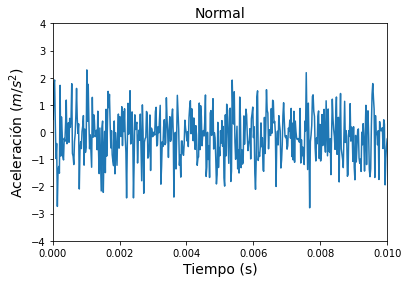

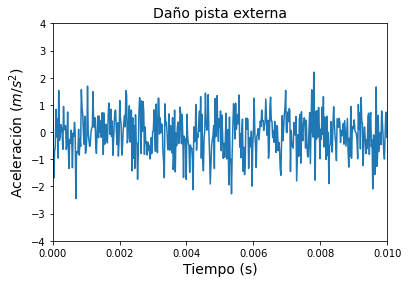

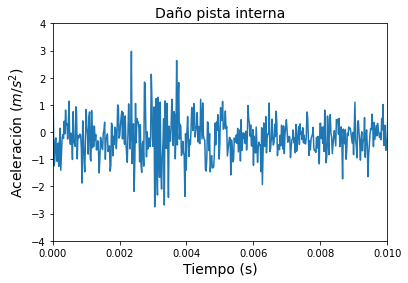

In [5]:
plt.plot(t,Normal)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Aceleración ' "$(m/s^2)$", fontsize=14)
plt.title('Normal', fontsize=14)
plt.xlim(0,0.01)
plt.ylim(-4,4)
plt.show()

plt.plot(t,Outer)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Aceleración ' "$(m/s^2)$", fontsize=14)
plt.title('Daño pista externa', fontsize=14)
plt.xlim(0,0.01)
plt.ylim(-4,4)
plt.show()

plt.plot(t,Inner)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Aceleración ' "$(m/s^2)$", fontsize=14)
plt.title('Daño pista interna', fontsize=14)
plt.xlim(0,0.01)
plt.ylim(-4,4)
plt.show()

Calcularemos a continuación parámetros por tramos, es decir, se tomarán distintos segmentos a lo largo de la señal con el fin de caracterizarla por partes, con un overlap de un 20%. 

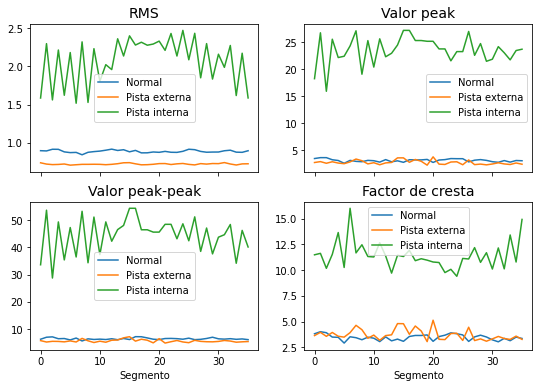

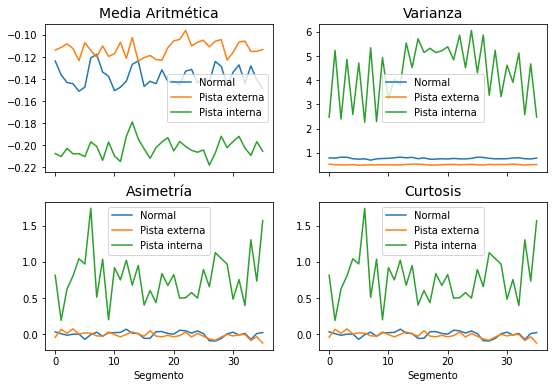

In [8]:
#calcular parametros por tramos
L=5000 #largo de los segmentos
l=1000 #overlap
Nt=math.floor((N-l)/(L-l)) #total de tramos


#inicializar matrices con ceros para ingresar los parametros
Pn=np.zeros((Nt,8))
Po=np.zeros((Nt,8))
Pi=np.zeros((Nt,8))

#Por medio de un ciclo for se calculará e ingresará los parámetros calculados para cada uno de los segmentos
for i in range(1,Nt+1):
    inicio=(i-1)*L-(i-1)*l+1
    fin=i*L-(i-1)*l

    Pn[i-1,0]=sqrt(mean(square(Normal[inicio:fin]))) #RMS
    Pn[i-1,1]=np.amax(Normal[inicio:fin]) #Peak
    Pn[i-1,2]=np.amax(Normal[inicio:fin])-np.amin(Normal[inicio:fin]) #peak-peak
    Pn[i-1,3]=Pn[i-1,1]/Pn[i-1,0] #crest
    Pn[i-1,4]=np.mean(Normal[inicio:fin]) #Media
    Pn[i-1,5]=np.var(Normal[inicio:fin]) #var
    Pn[i-1,6]=skew(Normal[inicio:fin])[0] #asimetria
    Pn[i-1,7]=kurtosis(Normal[inicio:fin])[0] #curtosis
    
    Po[i-1,0]=sqrt(mean(square(Outer[inicio:fin]))) #RMS
    Po[i-1,1]=np.amax(Outer[inicio:fin]) #Peak
    Po[i-1,2]=np.amax(Outer[inicio:fin])-np.amin(Outer[inicio:fin]) #peak-peak
    Po[i-1,3]=Po[i-1,1]/Po[i-1,0] #crest
    Po[i-1,4]=np.mean(Outer[inicio:fin]) #Media
    Po[i-1,5]=np.var(Outer[inicio:fin]) #var
    Po[i-1,6]=skew(Outer[inicio:fin])[0] #asimetria
    Po[i-1,7]=kurtosis(Outer[inicio:fin])[0] #curtosis
    
    Pi[i-1,0]=sqrt(mean(square(Inner[inicio:fin]))) #RMS
    Pi[i-1,1]=np.amax(Inner[inicio:fin]) #Peak
    Pi[i-1,2]=np.amax(Inner[inicio:fin])-np.amin(Inner[inicio:fin]) #peak-peak
    Pi[i-1,3]=Pi[i-1,1]/Pi[i-1,0] #crest
    Pi[i-1,4]=np.mean(Inner[inicio:fin]) #Media
    Pi[i-1,5]=np.var(Inner[inicio:fin]) #var
    Pi[i-1,6]=skew(Inner[inicio:fin])[0] #asimetria
    Pi[i-1,7]=kurtosis(Inner[inicio:fin])[0] #curtosis


#graficar datos
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax1.plot(Pn[:,0])
ax1.plot(Po[:,0])
ax1.plot(Pi[:,0])
ax1.legend(['Normal','Pista externa','Pista interna'])
ax1.set_title('RMS', fontsize=14)

ax2.plot(Pn[:,1])
ax2.plot(Po[:,1])
ax2.plot(Pi[:,1])
ax2.legend(['Normal','Pista externa','Pista interna'])
ax2.set_title('Valor peak', fontsize=14)

ax3.plot(Pn[:,2])
ax3.plot(Po[:,2])
ax3.plot(Pi[:,2])
ax3.legend(['Normal','Pista externa','Pista interna'])
ax3.set(xlabel='Segmento')
ax3.set_title('Valor peak-peak', fontsize=14)

ax4.plot(Pn[:,3])
ax4.plot(Po[:,3])
ax4.plot(Pi[:,3])
ax4.legend(['Normal','Pista externa','Pista interna'])
ax4.set(xlabel='Segmento')
ax4.set_title('Factor de cresta', fontsize=14)


f, ((ax5, ax6), (ax7, ax8)) = plt.subplots(2, 2, sharex='col',figsize=(9,6))
ax5.plot(Pn[:,4])
ax5.plot(Po[:,4])
ax5.plot(Pi[:,4])
ax5.legend(['Normal','Pista externa','Pista interna'])
ax5.set_title('Media Aritmética', fontsize=14)

ax6.plot(Pn[:,5])
ax6.plot(Po[:,5])
ax6.plot(Pi[:,5])
ax6.legend(['Normal','Pista externa','Pista interna'])
ax6.set_title('Varianza', fontsize=14)

ax7.plot(Pn[:,6])
ax7.plot(Po[:,6])
ax7.plot(Pi[:,6])
ax7.legend(['Normal','Pista externa','Pista interna'])
ax7.set(xlabel='Segmento')
ax7.set_title('Asimetría', fontsize=14)

ax8.plot(Pn[:,6])
ax8.plot(Po[:,6])
ax8.plot(Pi[:,6])
ax8.legend(['Normal','Pista externa','Pista interna'])
ax8.set(xlabel='Segmento')
ax8.set_title('Curtosis', fontsize=14)
plt.show()


Del resultado anterior se puede concluir que existen ciertos parámetros que permiten diferenciar de mejor forma los diferentes estados de salud del rodamiento, en particular, para el caso del RMS observamos una diferenciación clara entre los diferentes estados de salud, sea un aumento o disminución, esta diferenciación no se ve por ejemplo para el caso del parámetro peak to peak, no es posible diferenciar entre un rodamiento normal y otro con falla en la pista interna. En conclusión, dependiendo de la aplicación y falla a estudiar, se debe analizar cuales son los parámetros que optimicen una correcta diferenciación entre rodamientos y su estado de salud. 